# Length of stay 


### Introduction
Healthcare is one of the extremely important services of a nation to keep their population healthy and working for the economy to boom. Lack of healthcare or the collapse of healthcare can lead to massive implications for a country's development. This is the reason as to why every goverment of every country spends billions of dollars to improve and keep their healthcare functioning so as to give the general population affordable healthcare options.

However, challenges faced by a country such as India are far more complicated than the rest of the world. A country with 1.33 billion people with sizeable population living in the remote areas make it a very tough task for everyone to be provided with equal and afforable healthcare oppoptunities. Many poor people need to travel thousands of KMs to get the required healthcare. Another issue faced by healthcares due to the increasing population is the lack of beds and healthcare personnel. This has been especially observed during the tough times of COVID-19 where people with even mild symptoms would flock in big numbers at the goverment healthcare facilities making it extremely tough for the officials to manage the patients.

Innovative methods must be sought after so that the officials can be able to forecast the traffic of patients. Judging the health problems, we can come up with a ML algorithm that can predict how long would a patient require hospitalisation. If the algorithm can help the officials get a ballpark value of hospitalisation period, they'll be able to handle the traffic of patients much better.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_train = pd.read_csv("/Users/daksh/Desktop/curiosity_cup/AV_Healthcare_analytics/train_data.csv")
data_test = pd.read_csv("/Users/daksh/Desktop/curiosity_cup/AV_Healthcare_analytics/test_data.csv")
data_dict_train = pd.read_csv("/Users/daksh/Desktop/curiosity_cup/AV_Healthcare_analytics/train_data_dictionary.csv")

In [3]:
display(data_train)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
data_train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
data_train['City_Code_Patient'] = data_train['City_Code_Patient'].fillna(data_train['City_Code_Patient'].mode()[0])
data_test['City_Code_Patient'] = data_test['City_Code_Patient'].fillna(data_test['City_Code_Patient'].mode()[0])

data_train['Bed Grade'] = data_train['Bed Grade'].fillna(data_train['Bed Grade'].mode()[0])
data_test['Bed Grade'] = data_test['Bed Grade'].fillna(data_test['Bed Grade'].mode()[0])

In [7]:
data_train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

##### Some label encoding 

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data_train['Stay']=le.fit_transform(data_train['Stay'])

### Various Eda graphs 

In [11]:
# get length of stay dist and other important variables 

<AxesSubplot:xlabel='Stay', ylabel='Count'>

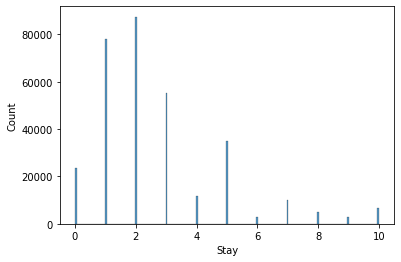

In [12]:
sns.histplot(data=data_train, x="Stay")

<AxesSubplot:xlabel='Hospital_code', ylabel='Count'>

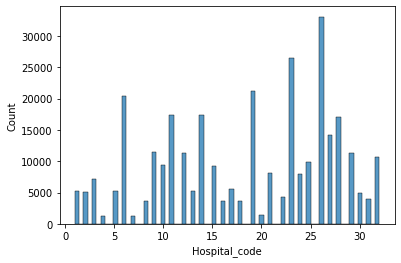

In [13]:
sns.histplot(data=data_train, x="Hospital_code")

<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='Count'>

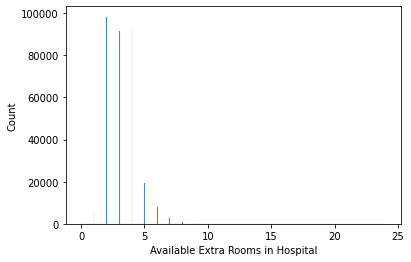

In [14]:
sns.histplot(data=data_train, x="Available Extra Rooms in Hospital")

In [15]:
data_train['Available Extra Rooms in Hospital'].value_counts()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
13        2
20        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64

<AxesSubplot:xlabel='Visitors with Patient', ylabel='Count'>

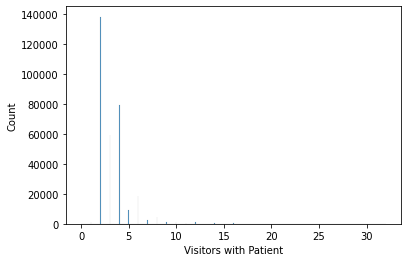

In [16]:
sns.histplot(data=data_train, x="Visitors with Patient")

In [17]:
data_train['Visitors with Patient'].value_counts()

2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
30         9
32         9
Name: Visitors with Patient, dtype: int64

In [18]:
#### to aid with analysis we shall bin variables 

bins = [0, 4, 8, 12, 32]
data_train['binned_VP'] = pd.cut(data_train['Visitors with Patient'], bins)

In [19]:
data_train['binned_VP'].value_counts()

(0, 4]      278029
(4, 8]       35455
(8, 12]       3836
(12, 32]      1096
Name: binned_VP, dtype: int64

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Count'>

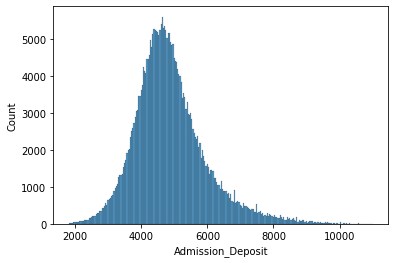

In [20]:
sns.histplot(data=data_train, x="Admission_Deposit")

<AxesSubplot:xlabel='Age', ylabel='Count'>

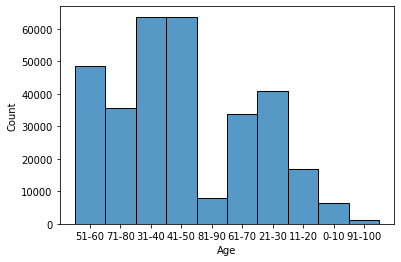

In [21]:
sns.histplot(data=data_train, x="Age")

<AxesSubplot:xlabel='Bed Grade', ylabel='Count'>

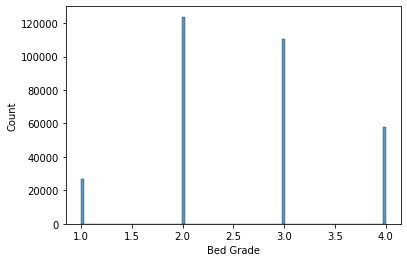

In [22]:
sns.histplot(data=data_train, x="Bed Grade")

### Feature comparisons 

**Basic comparisions**

LOS vs   Deposit Amount 

LOS vs   Department? 

LOS vs   Age + Severity of Illness + Admission Type 

LOS vs   Hospital Type + Bed Grade? 

LOS vs   Extra Room # + Hospital City + Hospital Region 

LOS vs   Visitor # + Severity of Illness 

**Top features from Random forest**

- 'Hospital_type_code', 'Hospital_code_18.0', 'Age', 'Severity of Illness', 'Hospital_code', 'Bed Grade_1.0', 'Bed Grade','Available Extra Rooms in Hospital', 'Admission_Deposit','Visitors with Patient'

In [23]:
data1 = data_train.groupby(['Stay', 'binned_VP'])['case_id'].count()

##### Stay-vs-vistors

<AxesSubplot:xlabel='Stay'>

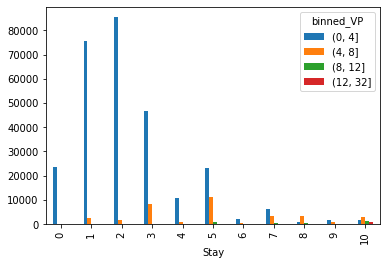

In [24]:

data1.unstack().plot(kind='bar', stacked=False)

In [26]:
bins = [0, 1, 2, 3, 4, 5, 10]
data_train['binned_Stay'] = pd.cut(data_train['Stay'], bins)

In [27]:
data_train['binned_Stay'].value_counts()

(1, 2]     87491
(0, 1]     78139
(2, 3]     55159
(4, 5]     35018
(5, 10]    27284
(3, 4]     11743
Name: binned_Stay, dtype: int64

<AxesSubplot:xlabel='binned_Stay'>

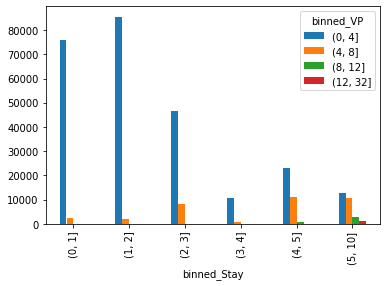

In [28]:
data2 = data_train.groupby(['binned_Stay', 'binned_VP'])['case_id'].count()
data2.unstack().plot(kind='bar', stacked=False)

<AxesSubplot:xlabel='binned_Stay'>

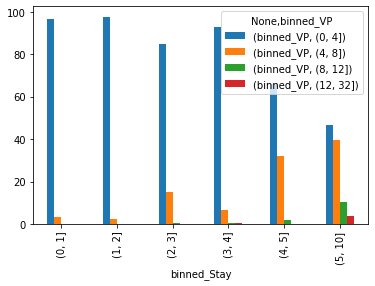

In [29]:
state_office = data_train.groupby(['binned_Stay', 'binned_VP']).agg({'binned_VP': 'count'})

 #Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=False)

#### number of vistors is weakly correlated with stay

##### Stay-vs-Extra Rooms

In [30]:
data_train['Available Extra Rooms in Hospital'].value_counts()


2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
13        2
20        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64

In [31]:
bins = [1, 2, 3, 4, 5, 24]
data_train['binned_Extra_rooms'] = pd.cut(data_train['Available Extra Rooms in Hospital'], bins)

In [32]:
data_train['binned_Extra_rooms'].value_counts()

(1, 2]     98311
(3, 4]     91709
(2, 3]     91520
(4, 5]     19288
(5, 24]    12013
Name: binned_Extra_rooms, dtype: int64

<AxesSubplot:xlabel='binned_Stay'>

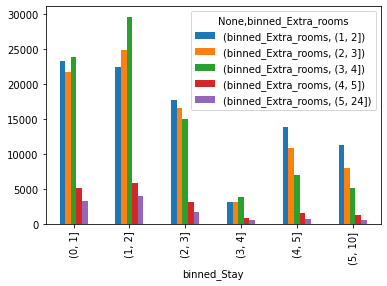

In [33]:
state_office = data_train.groupby(['binned_Stay', 'binned_Extra_rooms']).agg({'binned_Extra_rooms': 'count'})

 #Change: groupby state_office and divide by sum
#state_pcts = state_office.groupby(level=0).apply(lambda x:
 #                                                100 * x / float(x.sum()))
state_office.unstack().plot(kind='bar', stacked=False)





##### Stay-vs-Admission_Deposit

In [35]:
uniq_stay = data_train['binned_Stay'].unique()
uniq_stay

[NaN, (3.0, 4.0], (2.0, 3.0], (0.0, 1.0], (4.0, 5.0], (1.0, 2.0], (5.0, 10.0]]
Categories (6, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 10]]

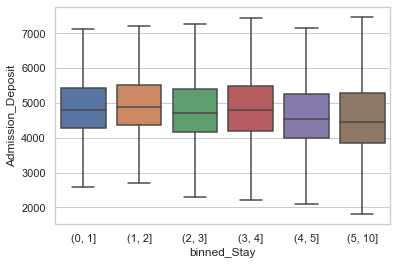

In [36]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
data2 = data_train[["binned_Stay", "Admission_Deposit"]]

ax = sns.boxplot(x="binned_Stay", y="Admission_Deposit", data=data2, showfliers = False)
#ax = sns.stripplot(x="Stay", y="Admission_Deposit", data=data2)

plt.show()

In [37]:
data_train.isna().sum()

case_id                                  0
Hospital_code                            0
Hospital_type_code                       0
City_Code_Hospital                       0
Hospital_region_code                     0
Available Extra Rooms in Hospital        0
Department                               0
Ward_Type                                0
Ward_Facility_Code                       0
Bed Grade                                0
patientid                                0
City_Code_Patient                        0
Type of Admission                        0
Severity of Illness                      0
Visitors with Patient                    0
Age                                      0
Admission_Deposit                        0
Stay                                     0
binned_VP                               22
binned_Stay                          23604
binned_Extra_rooms                    5597
dtype: int64